In [35]:
#crypto.py
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_style('darkgrid')
#from sklearn import linear_model
from sklearn.preprocessing  import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import roc_auc_score, roc_curve, explained_variance_score
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, f1_score, ConfusionMatrixDisplay # plot_confusion_matrix
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.mixture import GaussianMixture

In [36]:
curr_path = os.getcwd()
df = pd.read_csv(curr_path+"/data/crypto-markets.csv")

In [37]:
#Extracts only Bitcoin price
df=df[df["symbol"]=="BTC"]
print("data columns-->", list(df.columns))

data columns--> ['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread']


In [38]:
#Drops irrelevant columns
df_final = df.drop(["ranknow"], axis =1)

In [39]:
df.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [40]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


slug           0
symbol         0
name           0
date           0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64
Total number of null values: 0


Text(0.5, 1.0, 'Missing Values Count')

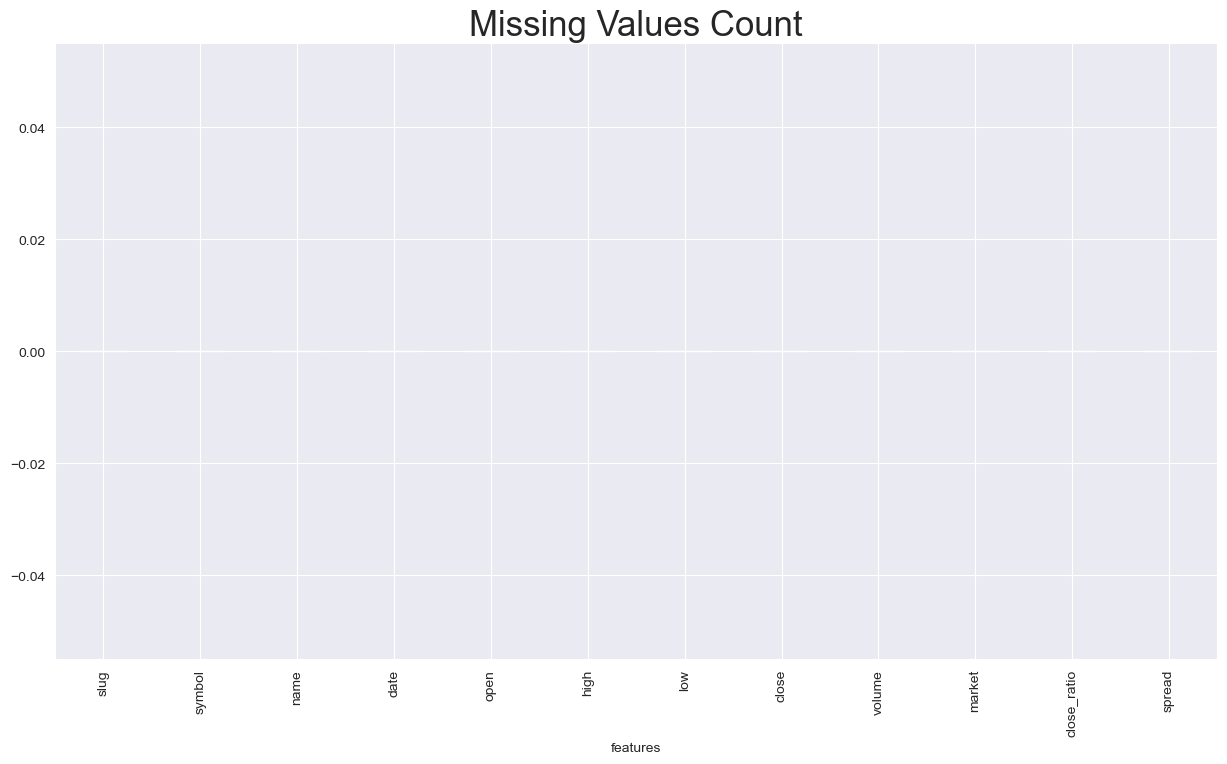

In [41]:
#Checks null values
print(df_final.isnull().sum())
print('Total number of null values:', df_final.isnull().sum().sum())
#Plots null values
missing = df_final.isna().sum().reset_index()
missing.columns = ['features','total_missing']
missing['percent'] =(missing['total_missing'] / len(df_final)) * 100
missing.index = missing['features']
del missing['features']
plt.figure(figsize=(15,8))
missing['total_missing'].plot(kind ='bar')
plt.title('Missing Values Count',fontsize = 25)

In [42]:
#Prints coefficient correlation ofevery column with Adj Close column
df = df_final
all_corr = df.corr().abs()['close'].sort_values(ascending = False)
print(all_corr.to_string())

close          1.000000
high           0.999089
low            0.998608
open           0.996980
market         0.996839
volume         0.940778
spread         0.863158
close_ratio    0.047269


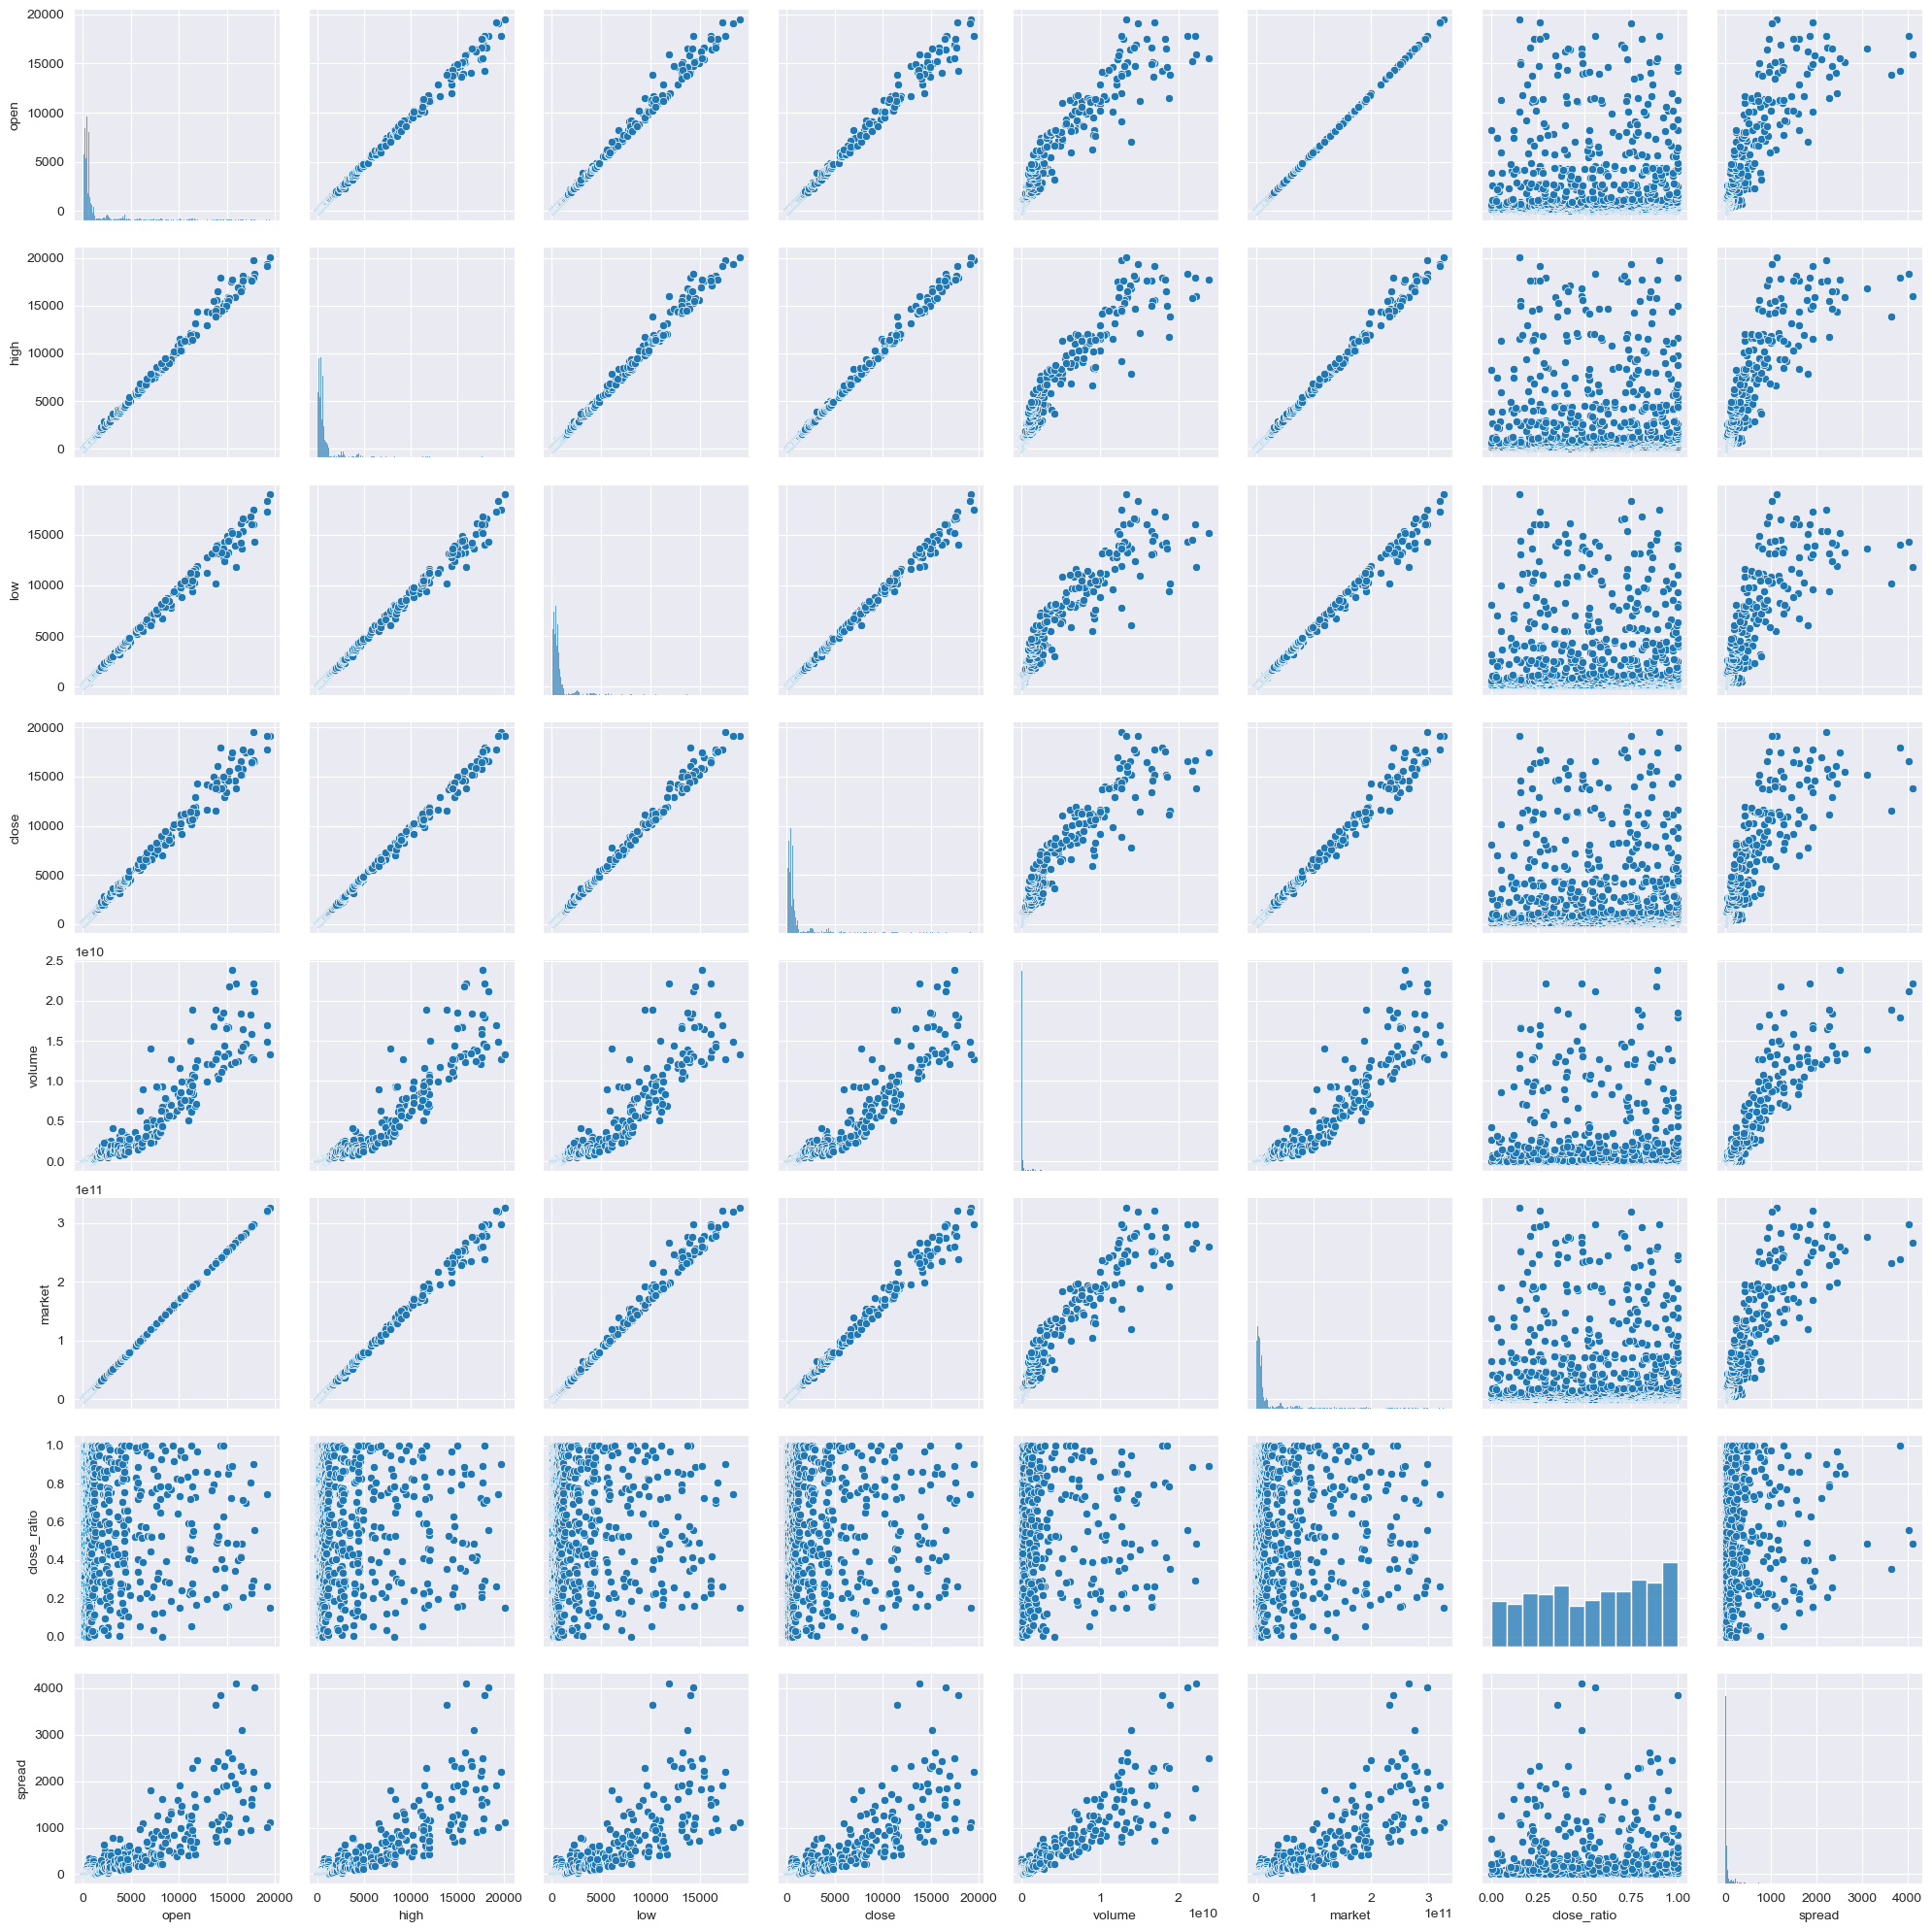

In [43]:
#Plots pair correlation of all features
sns.pairplot(df)
plt.tight_layout()

In [44]:
#Extracts day, month, week, quarter, and year
df['date'] =pd.to_datetime(df['date'])
df['Day'] = df['date'].dt.weekday
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Week']= df['date'].dt.week
df['Quarter']= df['date'].dt.quarter
#Sets Date column as index
df = df.set_index("date")

In [46]:
df.head(10)

,slug,symbol,name,open,high,low,close,volume,market,close_ratio,spread,Day,Month,Year,Week,Quarter
date,,,,,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88,6,4,2013,17,2
2013-04-29,bitcoin,BTC,Bitcoin,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49,0,4,2013,18,2
2013-04-30,bitcoin,BTC,Bitcoin,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88,1,4,2013,18,2
2013-05-01,bitcoin,BTC,Bitcoin,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17,2,5,2013,18,2
2013-05-02,bitcoin,BTC,Bitcoin,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32,3,5,2013,18,2
2013-05-03,bitcoin,BTC,Bitcoin,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03,4,5,2013,18,2
2013-05-04,bitcoin,BTC,Bitcoin,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50,5,5,2013,18,2
2013-05-05,bitcoin,BTC,Bitcoin,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66,6,5,2013,18,2
2013-05-06,bitcoin,BTC,Bitcoin,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02,0,5,2013,19,2


In [48]:
#Checks dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2013-04-28 to 2018-02-21
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         1761 non-null   object 
 1   symbol       1761 non-null   object 
 2   name         1761 non-null   object 
 3   open         1761 non-null   float64
 4   high         1761 non-null   float64
 5   low          1761 non-null   float64
 6   close        1761 non-null   float64
 7   volume       1761 non-null   int64  
 8   market       1761 non-null   int64  
 9   close_ratio  1761 non-null   float64
 10  spread       1761 non-null   float64
 11  Day          1761 non-null   int64  
 12  Month        1761 non-null   int64  
 13  Year         1761 non-null   int64  
 14  Week         1761 non-null   int64  
 15  Quarter      1761 non-null   int64  
dtypes: float64(6), int64(7), object(3)
memory usage: 233.9+ KB
None
